Choosing a classification algorithm

5 Steps to train ML algorithm:
  1. Selection of features
  2. Choosing a performance metric
  3. Choosing a classifier and optimization algorithm
  4. Evaluating the perfomance of the model
  5. Tuning the algorithm

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Loading the data
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [3]:
# Splitting data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [4]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
'''
    StandardScalar().fit: estimated the parameters sample mean and standard deviation
    transform standardizes the data using estimated mean and standard deviation
'''

'\n    StandardScalar().fit: estimated the parameters sample mean and standard deviation\n    transform standardizes the data using estimated mean and standard deviation\n'

In [4]:
# Training data
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
# Making predictions
y_pred = ppn.predict(X_test_std)
print ('Missclassified samples: %d' % (y_test != y_pred).sum())

Missclassified samples: 4


In [6]:
# Performance metrics
from sklearn.metrics import accuracy_score
print ('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [5]:
# Plotting decision regions
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setting up marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plotting the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 # ticks of graph
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot all samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1,0], y=X[y==c1,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)
    
    # Highlighting test samples
    if test_idx:
        X_test, t_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')


In [6]:
# Recombining the data

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

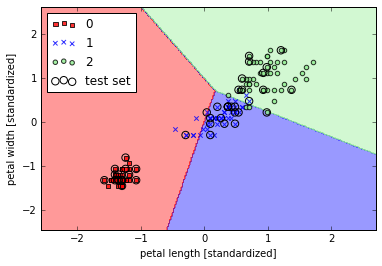

In [9]:
# Plotting the points

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Modeling Class Probabilities via Logistic Regression

Logistic Regression
- easy to implement and performs well on linearly separable classes
- linear model for binary classification
- can be extended to a multiclass classification via OvR technique

In [1]:
# Logistic Function / Logit Function / Sigmoid Function (s - shaped)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [4]:
# Creating the data points

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)

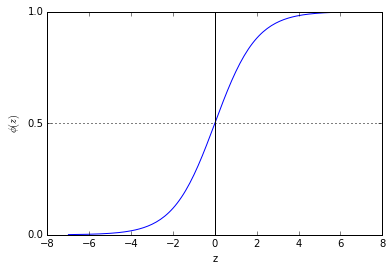

In [7]:
# Plotting the points

plt.plot(z, phi_z)
plt.axvline(0.0, color='k') # adds a vertical line at indication
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted') # creates a rectangle from a tick to another
plt.axhline(y=0.5, ls='dotted', color='k') 
plt.yticks([0.0, 0.5, 1.0])
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

$\phi (z)$ is the probability of the outcome and z is the input

Learning the Weights of the Logistic Cost Function

- liklihood L that we want to maximize when logistic regression model, assuming the individual samples in data set are independent of one another.
- penalize wrong predictions with increasingly larger cost

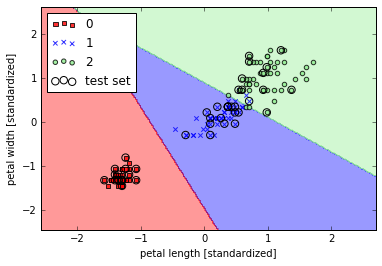

In [13]:
# Fitting a Logistic Regression and plotting the boundary

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [14]:
# Predicting the probability of the first data sample

lr.predict_proba(X_test_std[0,:])

/Users/tqrahman/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

### Tackling Overfitting via Regularization

Overfitting: fitting the training data too well where it does not perform well in new data

Underfitting: (high bias) model not complex enough to capture patterns in the trainging data

Variance: measures consistancy (or variability) of model prediction for a particular sample instance if it was retrained with the model. The consistancy of the prediction of one particular sample

Bias: measures how far off the predictions are from the actual value when the model is rebuilt multiple times on different datasets

Regularizaion:
- method to find a good bias-variance tradeoff
- handles collinearity (high correlation among features), filter out noise, and prevent overfitting
- introduce additional information (bias) to penalize extreme parameter weights
- L2 regularization (shrinkage): 

/Users/tqrahman/anaconda/lib/python2.7/site-packages/matplotlib/legend.py:325: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  six.iterkeys(self.codes))))


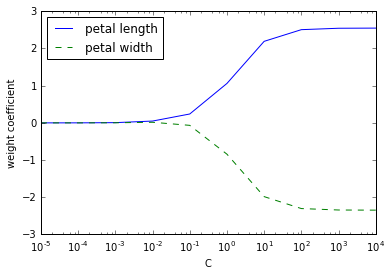

In [16]:
weights, params = [], []
for c in range(-5,5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper_left')
plt.xscale('log')
plt.show()

### Maximum Margin Classification with Support Vector Machines

Optimization objective is to maximize the margin
    - margin: distance the separating hyperplane and the training samples closest to the hyperplsne (support vectors)
Decision boundaries with large margins have lower generalization error
Tweaking the C parameter
    - Large values correspond to large error penalties 
    - Increasing value of C, increases bias but lowers variance

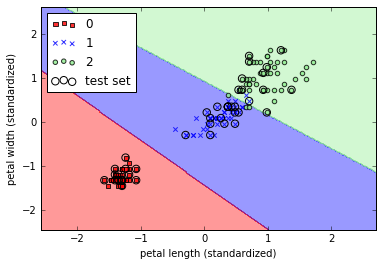

In [7]:
# Fitting SVC algorithm

from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()

In pratical classification tasks, logistic regression and SVMs often yields the same result. 
- LR 
  - maximizes the conditional likelihood of the training data (makes it prone to outliers).
  - better when working with streaming data
- SVM 
  - focuses on support vectors

### Solving nonlinear problems using a kernel SVM

In [8]:
# Creating a dataset with class label 1 and -1

np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)

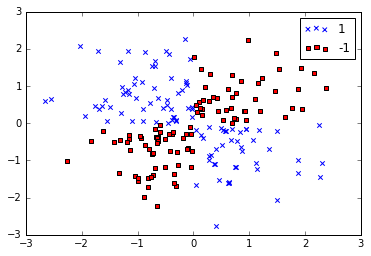

In [9]:
# Plotting the dataset

plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

Since the data is not linearly separable, nonlinear combinations of the original features needs to be created to project them into a higher dimension via a mapping function where it becomes linearly separable. Then the same mapping function can be used on unseen data.

### Gaussian or RBF kernel

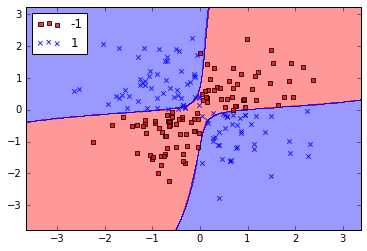

In [11]:
# Applying RBF kernel to the data

svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

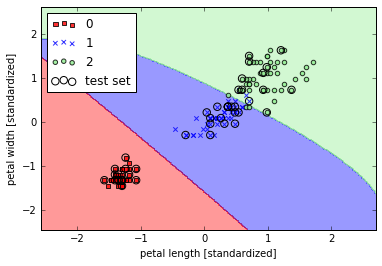

In [13]:
# Applying RBF kernel to the iris dataset

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

large value of gamma produces overfitting

### Decision Tree

- good for interpretability
- start from tree root and split the data on the feature that results in the largest information group
- repeat process for each child node until there are only one class left
- if tree is too deep then it may cause over-fitting. need to prune it

#### Maximizing Inofmration Gain

- the lower the impurity of the child nodes, the larger the information gain
- three types of impurity measures or splitting criteria
    - Gini impurity: minimize the probability of misclassification
    - entropy: maximizes the mutusl information in tree
    - classification error: good for pruning not building trees

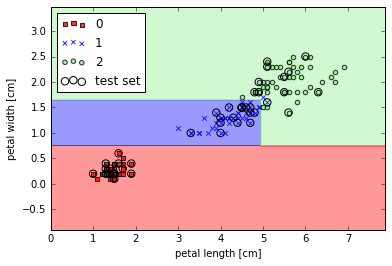

In [14]:
# Creating a decision tree for iris dataset

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### Combining Weak to Strong Learners via Random Forest

- ensemble of decision trees: combine weak learners into strong learners
- Steps:
    1. Draw a random bootstrap sample of size n (randomly select n samples from training set with replacement)
    2. Grow decision tree with from bootstrap sample
        - Randomly select d features without replacement
        - Split node using features that provides the best split according to objective function
    3. Repeat steps 1 to 2 k times
    4. Aggregate prediction by each tree to assign the class label using majority vote

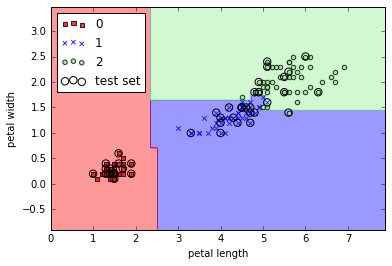

In [15]:
# Applying RF on iris dataset

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

### K-Nearest Neighbors - A Lazy Learning Algorithm

- doesnt learn a discriminative function from the training data but just memorizies it
- Steps:
    1. Choose the number of k and a distance metric
    2. Find the k nearest neighbors of the sample that is being classified
    3. Assign the class label by majority vote

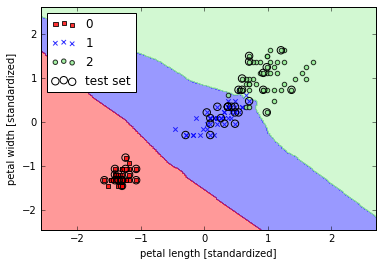

In [16]:
# Applying KNN to the iris dataset

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()